In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator 
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [2]:
train_path = '/content/drive/MyDrive/Colab Notebooks/AI/training-horse-or-human.zip (Unzipped Files)'
test_path = '/content/drive/MyDrive/Colab Notebooks/AI/validation-horse-or-human.zip (Unzipped Files)'

In [3]:
from keras.applications.inception_v3 import preprocess_input

def preprocess(x):
  x = np.expand_dims(x,axis = 0)
  x = preprocess_input(x)
  return x[0]

data_gen = ImageDataGenerator(rotation_range=40, shear_range=0.2,
                                    horizontal_flip = True, vertical_flip = False,
                                    zoom_range=0.2, fill_mode = 'nearest',
                                    preprocessing_function = preprocess)


train_generator = data_gen.flow_from_directory(os.path.join(train_path), target_size = (150,150))
valid_generator = data_gen.flow_from_directory(os.path.join(test_path), target_size = (150,150))

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [4]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1,5,figsize = (20, 20))
    axes = axes.flatten()
    
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


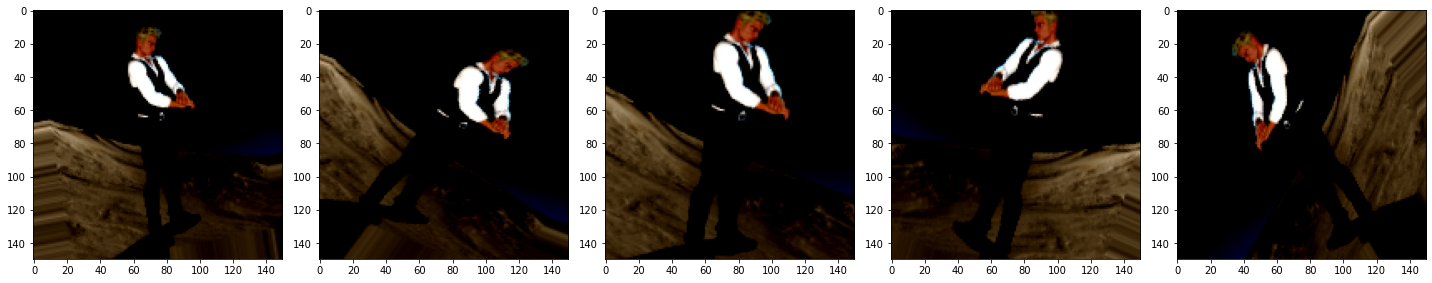

In [5]:
images_to_show = [train_generator[0][0][0] for i in range(5)] # taking 5 images.
plotImages(images_to_show)

In [6]:
def build_model():

  tf.keras.backend.clear_session()
  cnn_model = keras.models.Sequential(
      [
       keras.layers.Conv2D(filters = 32, kernel_size = 3, input_shape = [150, 150, 3]),
       keras.layers.MaxPooling2D(pool_size = (2,2)),
       keras.layers.Conv2D(filters = 64, kernel_size = 3),
       keras.layers.MaxPooling2D(pool_size = (2,2)),
       keras.layers.Conv2D(filters = 128, kernel_size = 3),
       keras.layers.MaxPooling2D(pool_size = (2,2)),
       keras.layers.Conv2D(filters = 256, kernel_size = 3),
       keras.layers.MaxPooling2D(pool_size = (2,2)),
       
       keras.layers.Dropout(0.5),
       keras.layers.Flatten(),
       keras.layers.Dense(units = 128, activation = 'relu'),
       keras.layers.Dropout(0.1),
       keras.layers.Dense(units = 256, activation = 'relu'),
       keras.layers.Dropout(0.25),
       keras.layers.Dense(units = 2, activation = 'softmax'), 
       ]
       )
  cnn_model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
  return cnn_model

In [7]:
model = build_model()

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

In [9]:
batch_size = 32

history = model.fit_generator(
    train_generator,
    epochs = 10, verbose =1, validation_data  =valid_generator, shuffle = False,
    steps_per_epoch = 1027//batch_size, validation_steps = 256//batch_size
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
32/32 [==============================] - 615s 19s/step - loss: 0.8424 - accuracy: 0.6953 - val_loss: 1.2643 - val_accuracy: 0.5195
Epoch 2/10
32/32 [==============================] - 16s 495ms/step - loss: 0.5028 - accuracy: 0.7822 - val_loss: 0.8509 - val_accuracy: 0.6875
Epoch 3/10
32/32 [==============================] - 15s 483ms/step - loss: 0.3627 - accuracy: 0.8584 - val_loss: 1.7110 - val_accuracy: 0.5703
Epoch 4/10
32/32 [==============================] - 15s 484ms/step - loss: 0.2594 - accuracy: 0.8955 - val_loss: 1.9327 - val_accuracy: 0.6719
Epoch 5/10
32/32 [==============================] - 16s 492ms/step - loss: 0.2243 - accuracy: 0.9062 - val_loss: 0.9025 - val_accuracy: 0.8359
Epoch 6/10
32/32 [==============================] - 15s 483ms/step - loss: 0.1620 - accuracy: 0.9424 - val_loss: 3.2682 - val_accuracy: 0.7148
Epoch 7/10
32/32 [==============================] - 16s 488ms/step - loss: 0.1941 - accuracy: 0.9316 - val_loss: 1.8786 - val_accuracy: 0.7305


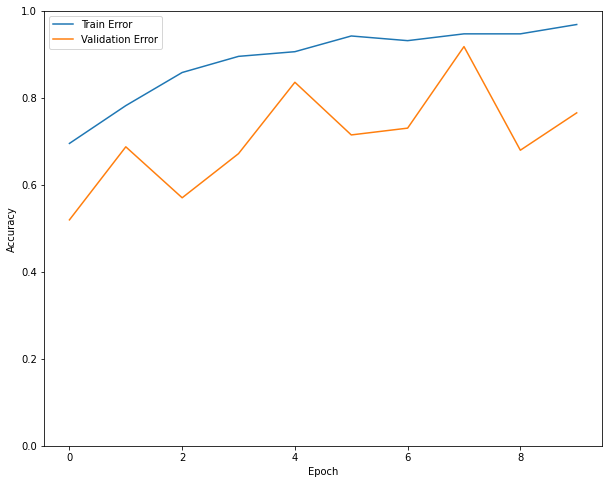

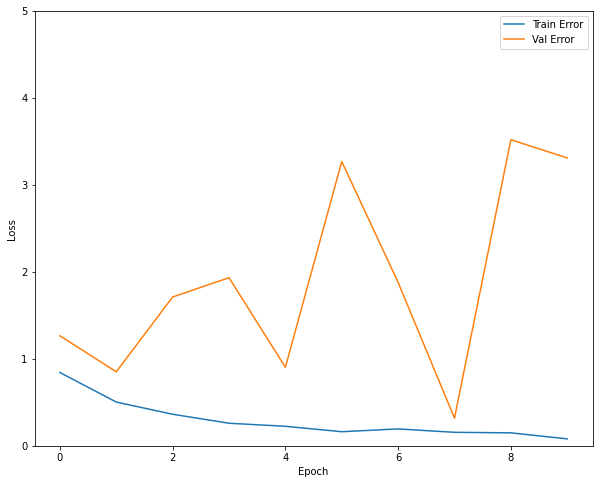

In [12]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(10,8))
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['accuracy'], label='Train Error')
  plt.plot(hist['epoch'], hist['val_accuracy'], label = 'Validation Error')
  plt.ylim([0,1])
  plt.legend()

  plt.figure(figsize=(10,8))
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'],label='Train Error')
  plt.plot(hist['epoch'], hist['val_loss'], label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()
  plt.show()

plot_history(history)

In [10]:
# early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=0.7)


# history2 = model.fit_generator(
#     train_generator,
#     epochs = 10, verbose =1, validation_data  =valid_generator, shuffle = False,
#     steps_per_epoch = 1027//batch_size, validation_steps = 256//batch_size,
#     callbacks=early_stop)


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
32/32 [==============================] - 16s 493ms/step - loss: 0.1741 - accuracy: 0.9609 - val_loss: 1.7674 - val_accuracy: 0.7773
Epoch 2/10
32/32 [==============================] - 15s 474ms/step - loss: 0.1159 - accuracy: 0.9658 - val_loss: 3.3030 - val_accuracy: 0.7148
